In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../Functions")
from GS_waves import select_freq_range, propagation_ew
from abtem.waves import PlaneWave
from Column_matching import Bessel_transform
import Generate_structure
from ase.visualize.plot import plot_atoms
from ase.io import read, write
from Complex_Gaussian import(
    Gaussian_function,
    Gaussian_in_focus,
    Gaussian_fitting
)

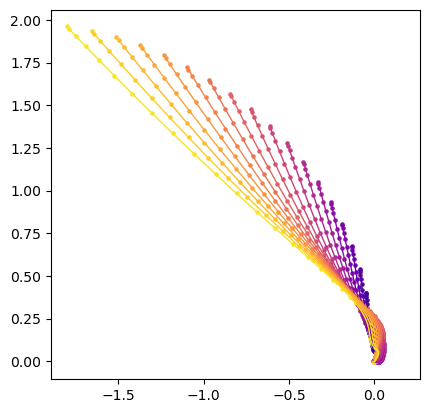

In [3]:
#Parameters to set
gmin = 0; gmax = 2; sampling = 0.0656015; energy = 300e3
a = 4.05; length = 50; cut_factor = 0.01
#Results from isolated column
n_repeat = 2
max_thickness = 20
thickness_range = np.arange(2, max_thickness, 1)
cmap = plt.get_cmap("plasma")
for thickness in thickness_range:
    theta = np.linspace(0, 2*np.pi, 100)
    cmap = plt.get_cmap("plasma")
    krange = np.linspace(gmin+0.01, gmax, length)
    #Generate periodic structure
    structure = Generate_structure.generate_periodic_fcc("Al", a, n_repeat, n_repeat, thickness)
    exitwave = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure).array),
                            gmin, gmax, sampling)
    m, n = exitwave.shape
    exitwave = exitwave[(n_repeat*2-1)*m//(n_repeat*4):(n_repeat*2+1)*m//(n_repeat*4),
                            (n_repeat*2-1)*n//(n_repeat*4):(n_repeat*2+1)*n//(n_repeat*4)]
    m, n = exitwave.shape
    exitwave = exitwave - 1
    x0, y0 = np.unravel_index(np.argmax(np.abs(exitwave)), exitwave.shape)
    results, components = Bessel_transform(exitwave, sampling, gmin+cut_factor, gmax, length, 
                                       x0=(x0-(m-1)/2)*sampling, y0=(y0-(n-1)/2)*sampling)
    ew_FT = np.fft.fft2(exitwave)
    area = m*n/a
    #plt.plot(np.real(exitwave), np.imag(exitwave), color=cmap(thickness/max_thickness), linewidth=0.1)
    plt.plot(np.real(results), np.imag(results) ,color=cmap(thickness/max_thickness), linewidth=1)
    plt.scatter(np.real(results), np.imag(results) ,color=cmap(thickness/max_thickness), s=5)
plt.axis("square")
plt.show()

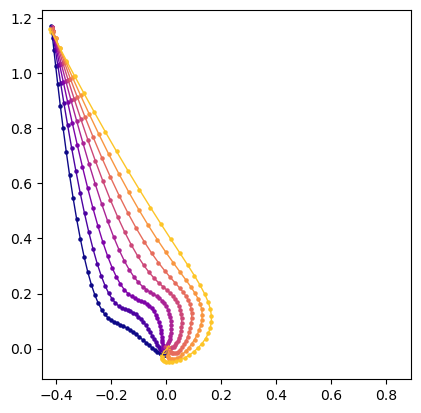

In [8]:
#Parameters to set
gmin = 0; gmax = 2; sampling = 0.0656015; energy = 300e3
a = 4.05; length = 50; cut_factor = 0.01
#Results from isolated column
n_repeat = 2
max_thickness = 5
thickness_range = np.arange(2, max_thickness, 1)
cmap = plt.get_cmap("plasma")
thickness = 8
max_distance = 20; prop_step = 5
distance_range = np.arange(-max_distance, max_distance, prop_step)
for prop_distance in distance_range:
    theta = np.linspace(0, 2*np.pi, 100)
    cmap = plt.get_cmap("plasma")
    krange = np.linspace(gmin+0.01, gmax, length)
    #Generate periodic structure
    structure = Generate_structure.generate_periodic_fcc("Al", a, n_repeat, n_repeat, thickness)
    exitwave = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure).array),
                            gmin, gmax, sampling)
    exitwave_prop = propagation_ew(exitwave, prop_distance, sampling, energy)
    m, n = exitwave_prop.shape
    exitwave_prop = exitwave_prop[(n_repeat*2-1)*m//(n_repeat*4):(n_repeat*2+1)*m//(n_repeat*4),
                            (n_repeat*2-1)*n//(n_repeat*4):(n_repeat*2+1)*n//(n_repeat*4)]
    m, n = exitwave_prop.shape
    exitwave_prop = exitwave_prop - 1
    x0, y0 = np.unravel_index(np.argmax(np.abs(exitwave_prop)), exitwave_prop.shape)
    results, components = Bessel_transform(exitwave_prop, sampling, gmin+cut_factor, gmax, length, 
                                       x0=(x0-(m-1)/2)*sampling, y0=(y0-(n-1)/2)*sampling)
    ew_FT = np.fft.fft2(exitwave_prop)
    #plt.scatter(np.real(components), np.imag(components), color=cmap(thickness/max_thickness), s=5)
    plt.plot(np.real(results), np.imag(results) ,color=cmap((prop_distance+max_distance)/(2*max_distance)), linewidth=1)
    plt.scatter(np.real(results), np.imag(results) ,color=cmap((prop_distance+max_distance)/(2*max_distance)), s=5)
plt.axis("square")
plt.show()

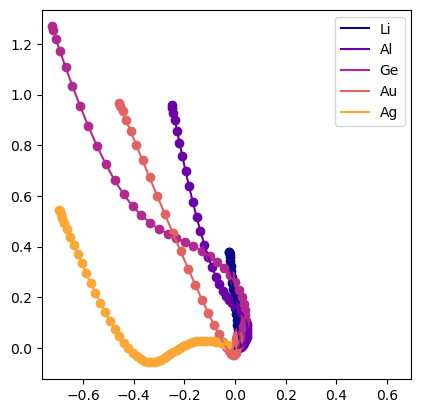

In [9]:
#Parameters to set
gmin = 0; gmax = 2; sampling = 0.0656015; energy = 300e3
length = 50; cut_factor = 0.01
#Results from isolated column
n_repeat = 2
max_thickness = 5
thickness_range = np.arange(2, max_thickness, 1)
cmap = plt.get_cmap("plasma")
thickness = 8
a_list = [3.44, 4.05, 5.66, 2.95, 2.90]
specimen_list = ["Li", "Al", "Ge", "Au", "Ag"]
for index, specimen in enumerate(specimen_list):
    theta = np.linspace(0, 2*np.pi, 100)
    cmap = plt.get_cmap("plasma")
    krange = np.linspace(gmin+0.01, gmax, length)
    #Generate periodic structure
    a = a_list[index]
    structure = Generate_structure.generate_column(specimen, thickness, a, (n_repeat)*a)
    exitwave = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure).array),
                            gmin, gmax, sampling)
    m, n = exitwave.shape
    exitwave = exitwave[(n_repeat*2-1)*m//(n_repeat*4):(n_repeat*2+1)*m//(n_repeat*4),
                            (n_repeat*2-1)*n//(n_repeat*4):(n_repeat*2+1)*n//(n_repeat*4)]
    m, n = exitwave.shape
    exitwave = exitwave - 1
    x0, y0 = np.unravel_index(np.argmax(np.abs(exitwave)), exitwave.shape)
    results, components = Bessel_transform(exitwave, sampling, gmin+cut_factor, gmax, length, 
                                       x0=(x0-(m-1)/2)*sampling, y0=(y0-(n-1)/2)*sampling)
    #plt.plot(krange, np.abs(results) ,color=cmap(index/5), label=specimen)
    plt.plot(np.real(results), np.imag(results) ,color=cmap(index/5), label=specimen)
    plt.scatter(np.real(results), np.imag(results) ,color=cmap(index/5))
plt.legend()
plt.axis("square")
plt.show()